In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv("Automobile_data.csv")

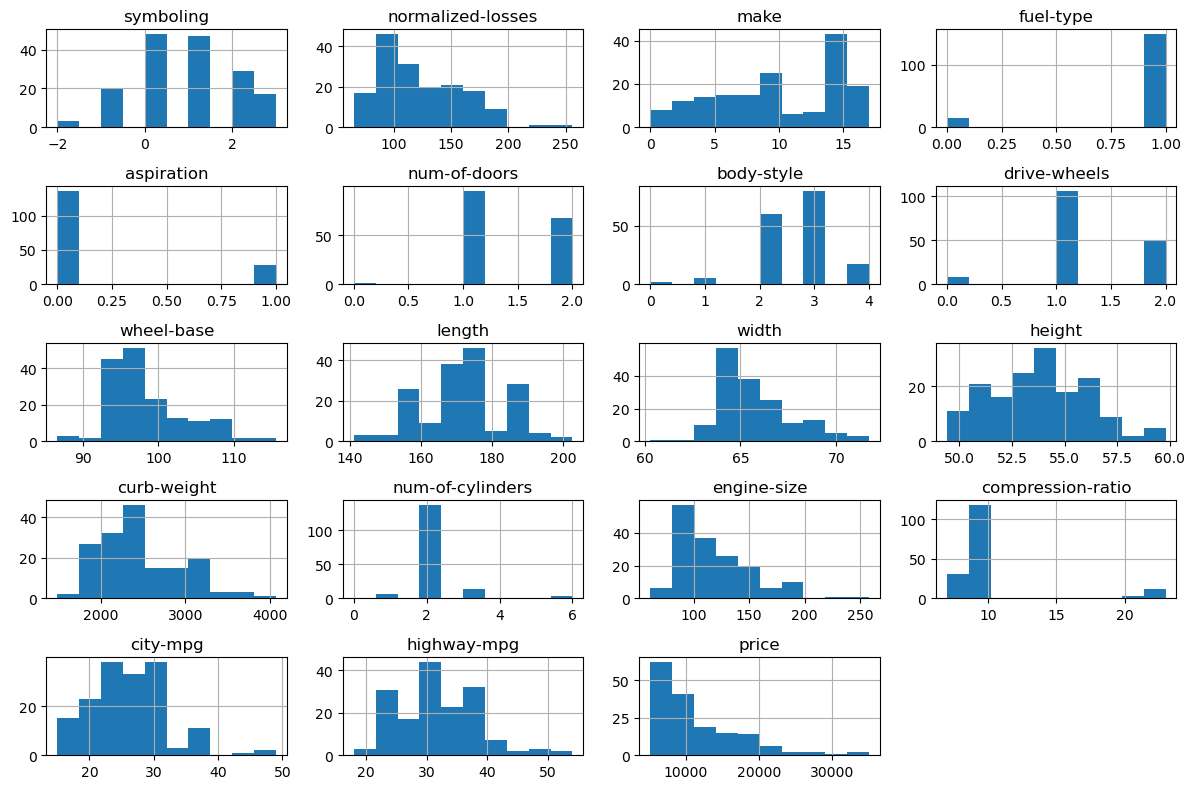

In [39]:
# Univariate Analysis
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

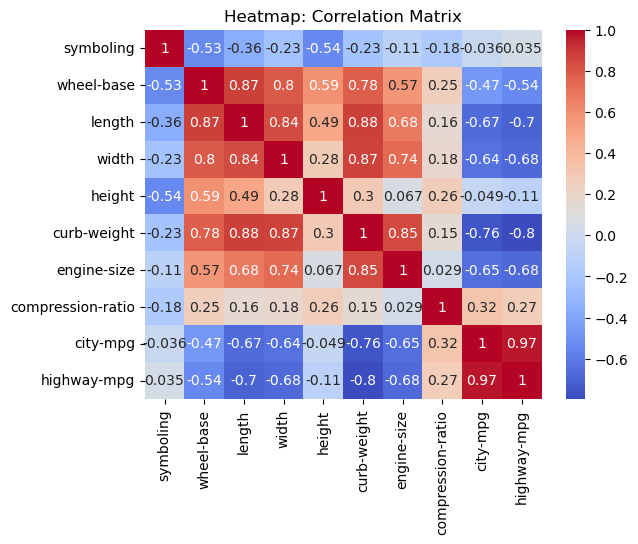

In [17]:
# Bivariate Analysis - Heatmap (Correlation)
numeric_cols = df.select_dtypes(include='number').columns
numeric_df = df[numeric_cols]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

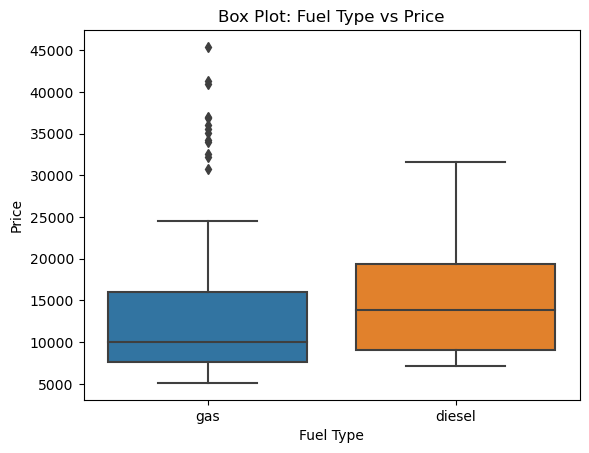

In [22]:
# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Bivariate Analysis - Box Plot
sns.boxplot(x='fuel-type', y='price', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Box Plot: Fuel Type vs Price')
plt.show()

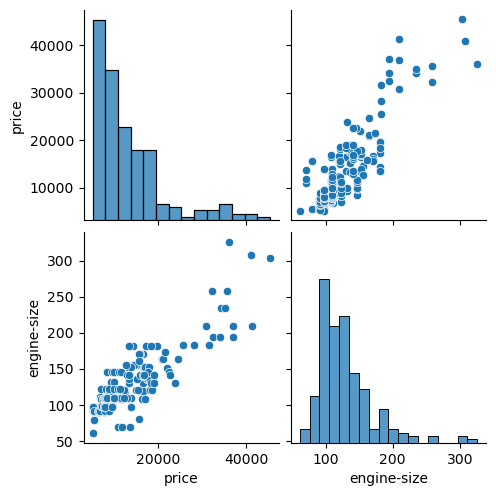

In [25]:
# Select the variables for multivariate analysis
variables = ['price', 'normalized-losses', 'engine-size', 'horsepower']

# Create a scatterplot matrix
sns.pairplot(df[variables])

In [26]:
# 4. Data Preprocessing
# Handling missing values
df.dropna(inplace=True)  # Drop rows with missing values or use appropriate techniques for imputation

In [32]:
import numpy as np
# Task 4: Perform Data Preprocessing

# 
# Replace '?' values with NaN
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan)

# Convert column to numeric type
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
# 

# Handling missing values
df.dropna(inplace=True)  # Dropping rows with missing values

# Handling categorical variables (Encoding)
le = LabelEncoder()
df['make'] = le.fit_transform(df['make'])

# Perform scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['symboling', 'price', 'normalized-losses']])

# Check correlation & Descriptive statistics
corr_matrix = df[['symboling', 'price', 'normalized-losses']].corr()
desc_stats = df[['symboling', 'price', 'normalized-losses']].describe()

In [35]:
# 5. Build Machine Learning Model

encoded_df = pd.get_dummies(df, drop_first=True)
X = encoded_df.drop('price', axis=1)
y = encoded_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# 6. Evaluate the Machine Learning model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 796267978.2942452
